# Fermi-LAT data with Gammapy

## Introduction

This tutorial will show you how to work with pepared Fermi-LAT datasets.

The main class to load the data is

* [gammapy.dataset.FermiLATDataset](http://docs.gammapy.org/en/latest/api/gammapy.dataset.FermiLATDataset.html)


In this tutorial we will use objects of these types:

* [gammapy.data.EventList](http://docs.gammapy.org/en/latest/api/gammapy.data.EventList.html)
* [gammapy.irf.EnergyDependentTablePSF](http://docs.gammapy.org/en/latest/api/gammapy.irf.EnergyDependentTablePSF.html).
* [gammapy.cube.SkyCube]()
* [gammapy.cube.SkyCubeHPX]()




## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from astropy import units as u
from gammapy.datasets import FermiLATDataset

## FermiLATDataset class

To access the prepared Fermi-LAT datasets Gammapy provides a convenience class called [FermiLATDataset](http://docs.gammapy.org/en/latest/api/gammapy.datasets.FermiLATDataset.html#gammapy.datasets.FermiLATDataset). It is initialized with a path to an index configuration file, which tells the dataset class where to find the data. Once 
the object initialized the data can be accessed as properties on the object, which return the correspoding Gammapy data objects for event lists, sky images and point spread functions (PSF). 

So let's start with exploring the Fermi-LAT 2FHL dataset:

In [8]:
# load dataset
dataset = FermiLATDataset('$GAMMAPY_FERMI_LAT_DATA/2fhl/fermi_2fhl_data_config.yaml')
print(dataset)

Fermi dataset
filenames:
  counts: fermi_2fhl_counts_cube_hpx.fits.gz
  events: fermi_2fhl_events.fits.gz
  exposure: fermi_2fhl_exposure_cube_hpx.fits.gz
  isodiff: ../isodiff/iso_P8R2_SOURCE_V6_v06.txt
  livetime: fermi_2fhl_livetime_cube.fits.gz
  psf: fermi_2fhl_psf_gc.fits.gz



## Events

In [4]:
events = dataset.events

energies = [50, 100, 200, 400, 800, 1600] * u.GeV

n_events_above_energy = []

for energy in energies:
    n = (events.energy > energy).sum()
    n_events_above_energy.append(n)   
    print("Number of events above {0:4.0f}: {1:5.0f}".format(energy, n))

Number of events above   50 GeV: 60275
Number of events above  100 GeV: 21874
Number of events above  200 GeV:  8028
Number of events above  400 GeV:  2884
Number of events above  800 GeV:   821
Number of events above 1600 GeV:   113


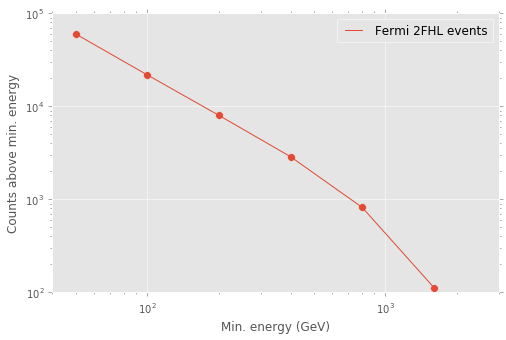

In [5]:
plt.figure(figsize=(8, 5))   
events_plot = plt.plot(energies.value, n_events_above_energy, label='Fermi 2FHL events')
plt.scatter(energies.value, n_events_above_energy, s=60, c=events_plot[0].get_color())
plt.loglog()
plt.xlabel("Min. energy (GeV)")
plt.ylabel("Counts above min. energy")
plt.xlim(4E1, 3E3)
plt.ylim(1E2, 1E5)
plt.legend()

## PSF

In [6]:
psf = dataset.psf
print(psf)

EnergyDependentTablePSF
-----------------------

Axis info:
  offset         : size =   300, min =  0.000 deg, max =  9.933 deg
  energy         : size =    17, min = 50.000 GeV, max = 2000.000 GeV
  exposure       : size =    17, min = 184244434125.149 cm2 s, max = 308160738535.443 cm2 s

Containment info:
  68.0% containment radius at  10 GeV: 0.10 deg
  68.0% containment radius at 100 GeV: 0.10 deg
  95.0% containment radius at  10 GeV: 0.52 deg
  95.0% containment radius at 100 GeV: 0.43 deg



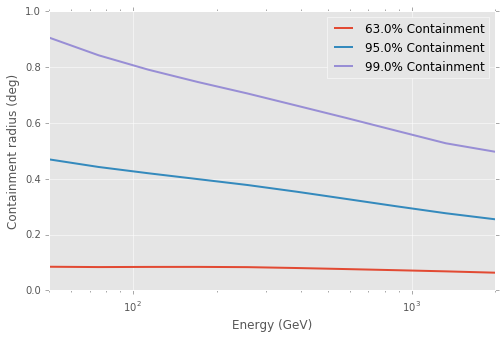

In [7]:

plt.figure(figsize=(8, 5))
psf.plot_containment_vs_energy(linewidth=2, fractions=[0.63, 0.95, 0.99])
plt.xlim(50, 2000)
plt.show()

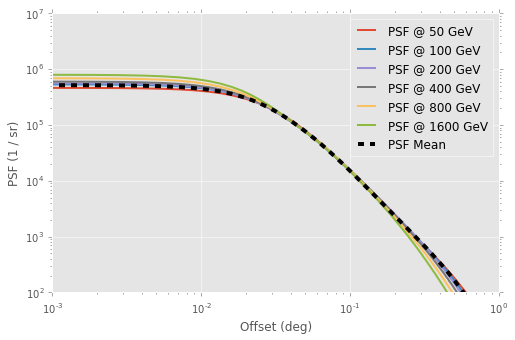

In [16]:
plt.figure(figsize=(8, 5))

for energy in energies:
    psf_at_energy = psf.table_psf_at_energy(energy)
    psf_at_energy.plot_psf_vs_theta(label='PSF @ {:.0f}'.format(energy), lw=2)

erange = [50, 2000] * u.GeV
psf_mean = psf.table_psf_in_energy_band(energy_band=erange, spectral_index=2.3)
psf_mean.plot_psf_vs_theta(label='PSF Mean', lw=4, c="k", ls='--')
    
plt.xlim(1E-3, 1)
plt.ylim(100, 1E7)
plt.legend()

## Exposure

In [36]:
exposure = dataset.exposure

In [37]:
exposure_10GeV = exposure.sky_image_healpix(10 * u.GeV)

TypeError: 'float' object cannot be interpreted as an integer

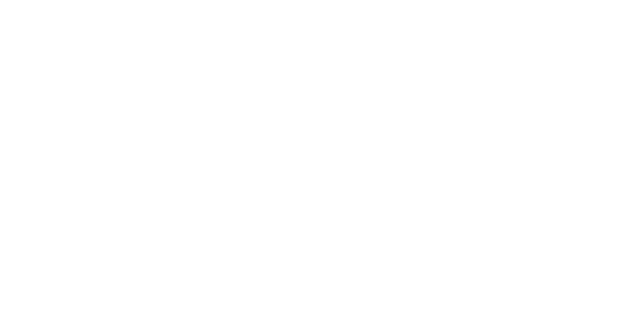

In [38]:
exposure_10GeV.plot()

## Galactic diffuse background

In [9]:
galactic_diffuse = dataset.galactic_diffuse

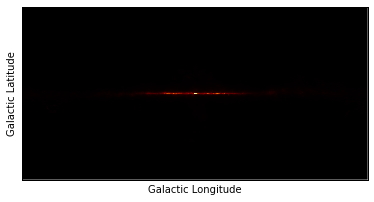

In [23]:
galactic_diffuse.show()

## Isotropic diffuse background

## Exercises

- Repeat the exercise using the pepared Fermi-LAT 3FHL dataset

## What next?

In this tutorial we have learned how to access and check Fermi-LAT data.

Next you could do:
* image analysis
* spectral analysis
* cube analysis
* time analysis
* source detection